Enlazar archivo guardado en el drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install tensorflow scikit-learn

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

Cargar el dataset

In [4]:
datos = pd.read_csv('/content/drive/MyDrive/medicamentos/medicamentos.csv')

datos = datos.replace(',', '.', regex=True)

datos.to_csv("dataset_modificado.csv", index=False)



In [5]:
datos['fechavencimiento'] = pd.to_datetime(datos['fechavencimiento'])
datos['fechaexpedicion'] = pd.to_datetime(datos['fechaexpedicion'])
datos['fechaactivo'] = pd.to_datetime(datos['fechaactivo'])
datos['fechainactivo'] = pd.to_datetime(datos['fechainactivo'])

default_date = pd.Timestamp('00:00:00')
datos['fechavencimiento'] = datos['fechavencimiento'].fillna(default_date)
datos['fechaexpedicion'] = datos['fechaexpedicion'].fillna(default_date)
datos['fechaactivo'] = datos['fechaactivo'].fillna(default_date)
datos['fechainactivo'] = datos['fechainactivo'].fillna(default_date)


In [6]:
del datos['cantidadcum']
del datos['expedientecum' ]
del datos['concentracion' ]
del datos['descripcioncomercial']
del datos['unidad' ]
del datos['atc' ]
del datos['descripcionatc' ]
del datos['viaadministracion']
del datos['unidadmedida' ]
del datos['unidadreferencia' ]
del datos['formafarmaceutica']
del datos['muestramedica' ]
del datos['cantidad' ]
del datos['IUM' ]
del datos['consecutivocum']


In [7]:
datos['producto'] = datos['producto'].astype(str)
datos['titular'] = datos['titular'].astype(str)


In [8]:
# Eliminar filas duplicadas en el DataFrame
datos = datos.drop_duplicates()

In [9]:
datos.head(50)

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,estadocum,fechaactivo,fechainactivo,principioactivo,nombrerol,tiporol,modalidad
0,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,1999-12-20,2026-11-17,Vigente,Inactivo,2006-10-11,2015-12-12,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER
1,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,1999-12-20,2026-11-17,Vigente,Inactivo,2006-10-11,2011-08-02,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER
2,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,1999-12-20,2026-11-17,Vigente,Activo,2011-08-02,2023-12-07,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER
8,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,1999-12-20,2026-11-17,Vigente,Activo,2011-09-14,2023-12-07,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER
11,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,1999-12-20,2026-11-17,Vigente,Activo,2013-01-14,2023-12-07,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER
12,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,1999-12-20,2026-11-17,Vigente,Activo,2015-12-12,2023-12-07,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER
13,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,1999-12-20,2026-11-17,Vigente,Activo,2017-08-31,2023-12-07,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER
16,5581,BRONCHO-VAXOM®CAPSULAS ADULTOS,OM PHARMA SA,INVIMA 2023MB-007838-R4,1999-01-01,2028-09-03,Vigente,Inactivo,2006-10-11,2023-12-07,LISADOS BACTERIANOS LIOFILIZADOS DE HAEMOPHILU...,AXON PHARMA S.A.S.,IMPORTADOR,IMPORTAR Y VENDER
17,5581,BRONCHO-VAXOM®CAPSULAS ADULTOS,OM PHARMA SA,INVIMA 2023MB-007838-R4,1999-01-01,2028-09-03,Vigente,Inactivo,2006-10-11,2023-12-07,LISADOS BACTERIANOS LIOFILIZADOS DE HAEMOPHILU...,OM PHARMA SA,FABRICANTE,IMPORTAR Y VENDER
20,5581,BRONCHO-VAXOM®CAPSULAS ADULTOS,OM PHARMA SA,INVIMA 2023MB-007838-R4,1999-01-01,2028-09-03,Vigente,Inactivo,2007-04-05,2016-02-09,LISADOS BACTERIANOS LIOFILIZADOS DE HAEMOPHILU...,AXON PHARMA S.A.S.,IMPORTADOR,IMPORTAR Y VENDER


Timestamp

In [10]:
datos['fechaexpedicion'] = datos['fechaexpedicion'].apply(lambda x: x.timestamp())
datos['fechavencimiento'] = datos['fechavencimiento'].apply(lambda x: x.timestamp())
datos['fechaactivo'] = datos['fechaactivo'].apply(lambda x: x.timestamp())
datos['fechainactivo'] = datos['fechainactivo'].apply(lambda x: x.timestamp())


Promedio


In [11]:
PromedioFechas = datos[['fechaexpedicion', 'fechavencimiento']].mean(axis=1)
datos['Promedio'] = PromedioFechas


In [12]:
datos.head(50)

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,estadocum,fechaactivo,fechainactivo,principioactivo,nombrerol,tiporol,modalidad,Promedio
0,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Inactivo,1.160525e+09,1.449878e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
1,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Inactivo,1.160525e+09,1.312243e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
2,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Activo,1.312243e+09,1.701907e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
8,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Activo,1.315958e+09,1.701907e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
11,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Activo,1.358122e+09,1.701907e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
12,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Activo,1.449878e+09,1.701907e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
13,3521,ALERCET ® JARABE,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Activo,1.504138e+09,1.701907e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
16,5581,BRONCHO-VAXOM®CAPSULAS ADULTOS,OM PHARMA SA,INVIMA 2023MB-007838-R4,915148800.0,1.851552e+09,Vigente,Inactivo,1.160525e+09,1.701907e+09,LISADOS BACTERIANOS LIOFILIZADOS DE HAEMOPHILU...,AXON PHARMA S.A.S.,IMPORTADOR,IMPORTAR Y VENDER,1.383350e+09
17,5581,BRONCHO-VAXOM®CAPSULAS ADULTOS,OM PHARMA SA,INVIMA 2023MB-007838-R4,915148800.0,1.851552e+09,Vigente,Inactivo,1.160525e+09,1.701907e+09,LISADOS BACTERIANOS LIOFILIZADOS DE HAEMOPHILU...,OM PHARMA SA,FABRICANTE,IMPORTAR Y VENDER,1.383350e+09
20,5581,BRONCHO-VAXOM®CAPSULAS ADULTOS,OM PHARMA SA,INVIMA 2023MB-007838-R4,915148800.0,1.851552e+09,Vigente,Inactivo,1.175731e+09,1.454976e+09,LISADOS BACTERIANOS LIOFILIZADOS DE HAEMOPHILU...,AXON PHARMA S.A.S.,IMPORTADOR,IMPORTAR Y VENDER,1.383350e+09


In [13]:
datos.shape

(38698, 15)

In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38698 entries, 0 to 114705
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   expediente         38698 non-null  int64  
 1   producto           38698 non-null  object 
 2   titular            38698 non-null  object 
 3   registrosanitario  38698 non-null  object 
 4   fechaexpedicion    38698 non-null  float64
 5   fechavencimiento   38698 non-null  float64
 6   estadoregistro     38698 non-null  object 
 7   estadocum          38698 non-null  object 
 8   fechaactivo        38698 non-null  float64
 9   fechainactivo      38698 non-null  float64
 10  principioactivo    38698 non-null  object 
 11  nombrerol          38698 non-null  object 
 12  tiporol            38698 non-null  object 
 13  modalidad          38698 non-null  object 
 14  Promedio           38698 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 4.7+ MB


In [15]:
datos.dtypes

expediente             int64
producto              object
titular               object
registrosanitario     object
fechaexpedicion      float64
fechavencimiento     float64
estadoregistro        object
estadocum             object
fechaactivo          float64
fechainactivo        float64
principioactivo       object
nombrerol             object
tiporol               object
modalidad             object
Promedio             float64
dtype: object

In [16]:
datos.describe()

,expediente,fechaexpedicion,fechavencimiento,fechaactivo,fechainactivo,Promedio
count,3.869800e+04,3.869800e+04,3.869800e+04,3.869800e+04,3.869800e+04,3.869800e+04
mean,1.708055e+07,1.263124e+09,1.785009e+09,1.398848e+09,1.663609e+09,1.524067e+09
std,7.078071e+06,2.499311e+08,4.801744e+07,1.622177e+08,9.774727e+07,1.265015e+08
min,3.521000e+03,6.005664e+08,1.673309e+09,1.160525e+09,-2.208989e+09,1.170461e+09
25%,1.993513e+07,1.059091e+09,1.746230e+09,1.248070e+09,1.701907e+09,1.422576e+09
50%,2.001021e+07,1.269994e+09,1.784160e+09,1.416960e+09,1.701907e+09,1.532390e+09
75%,2.009082e+07,1.460592e+09,1.829520e+09,1.536106e+09,1.701907e+09,1.625778e+09
max,2.024415e+07,1.702166e+09,2.014330e+09,1.702080e+09,1.702080e+09,1.855915e+09


In [17]:
datos.expediente.describe()

count    3.869800e+04
mean     1.708055e+07
std      7.078071e+06
min      3.521000e+03
25%      1.993513e+07
50%      2.001021e+07
75%      2.009082e+07
max      2.024415e+07
Name: expediente, dtype: float64

In [18]:
datos.columns

Index(['expediente', 'producto', 'titular', 'registrosanitario',
       'fechaexpedicion', 'fechavencimiento', 'estadoregistro', 'estadocum',
       'fechaactivo', 'fechainactivo', 'principioactivo', 'nombrerol',
       'tiporol', 'modalidad', 'Promedio'],
      dtype='object')

In [19]:
columnas = datos.columns
columnas

Index(['expediente', 'producto', 'titular', 'registrosanitario',
       'fechaexpedicion', 'fechavencimiento', 'estadoregistro', 'estadocum',
       'fechaactivo', 'fechainactivo', 'principioactivo', 'nombrerol',
       'tiporol', 'modalidad', 'Promedio'],
      dtype='object')

In [20]:
datos.tail()

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,estadocum,fechaactivo,fechainactivo,principioactivo,nombrerol,tiporol,modalidad,Promedio
114701,20239915,MILACID® SACHET POR 10ML SABOR MENTA,BIOFLUIDOS & FARMA S.A.S.,INVIMA 2023M-0020967,1.693872e+09,1.842826e+09,Vigente,Activo,1.681776e+09,1.701907e+09,ALGINATO DE SODIO,QUIBI S.A. EN REESTRUCTURACION,FABRICANTE,FABRICAR Y VENDER,1.768349e+09
114702,20239915,MILACID® SACHET POR 10ML SABOR MENTA,BIOFLUIDOS & FARMA S.A.S.,INVIMA 2023M-0020967,1.693872e+09,1.842826e+09,Vigente,Activo,1.681776e+09,1.701907e+09,BICARBONATO DE SODIO,QUIBI S.A. EN REESTRUCTURACION,FABRICANTE,FABRICAR Y VENDER,1.768349e+09
114703,20239915,MILACID® SACHET POR 10ML SABOR MENTA,BIOFLUIDOS & FARMA S.A.S.,INVIMA 2023M-0020967,1.693872e+09,1.842826e+09,Vigente,Activo,1.681776e+09,1.701907e+09,CARBONATO DE CALCIO,QUIBI S.A. EN REESTRUCTURACION,FABRICANTE,FABRICAR Y VENDER,1.768349e+09
114704,20243782,KEPINIA 25 MG,SALUS PHARMA LABS S.A.S.,INVIMA 2023M-0020955,1.680653e+09,1.842739e+09,Vigente,Activo,1.680134e+09,1.701907e+09,QUETIAPINA FUMARATO EQUIVALENTE A QUETIAPINA BASE,NUTRI MACK S.A.S.,FABRICANTE,FABRICAR Y VENDER,1.761696e+09
114705,20244153,KEPINIA 100 MG,SALUS PHARMA LABS S.A.S.,INVIMA 2023M-0020954,1.680653e+09,1.842739e+09,Vigente,Activo,1.680134e+09,1.701907e+09,QUETIAPINA FUMARATO EQUIVALENTE A QUETIAPINA BASE,NUTRI MACK S.A.S.,FABRICANTE,FABRICAR Y VENDER,1.761696e+09


<Axes: ylabel='Frequency'>

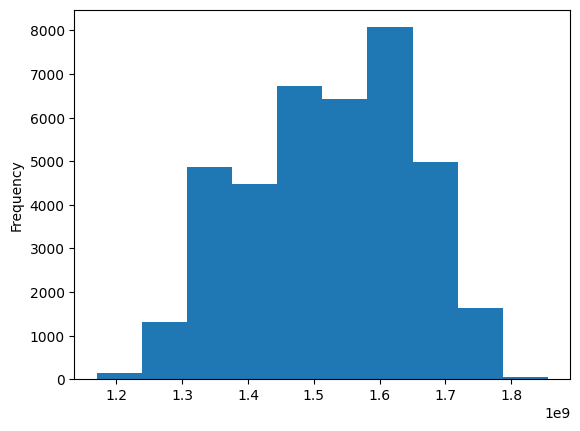

In [21]:
datos['Promedio'].plot.hist()

<Axes: >

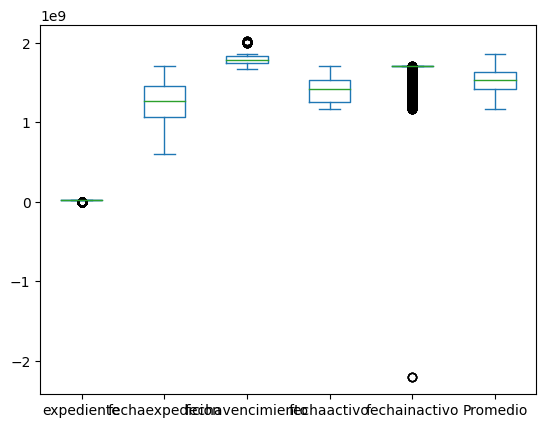

In [22]:
datos.plot.box()

In [23]:
k=0
for i in datos.producto.unique():
    datos.producto.replace(i, k, inplace = True)
    k = k+1

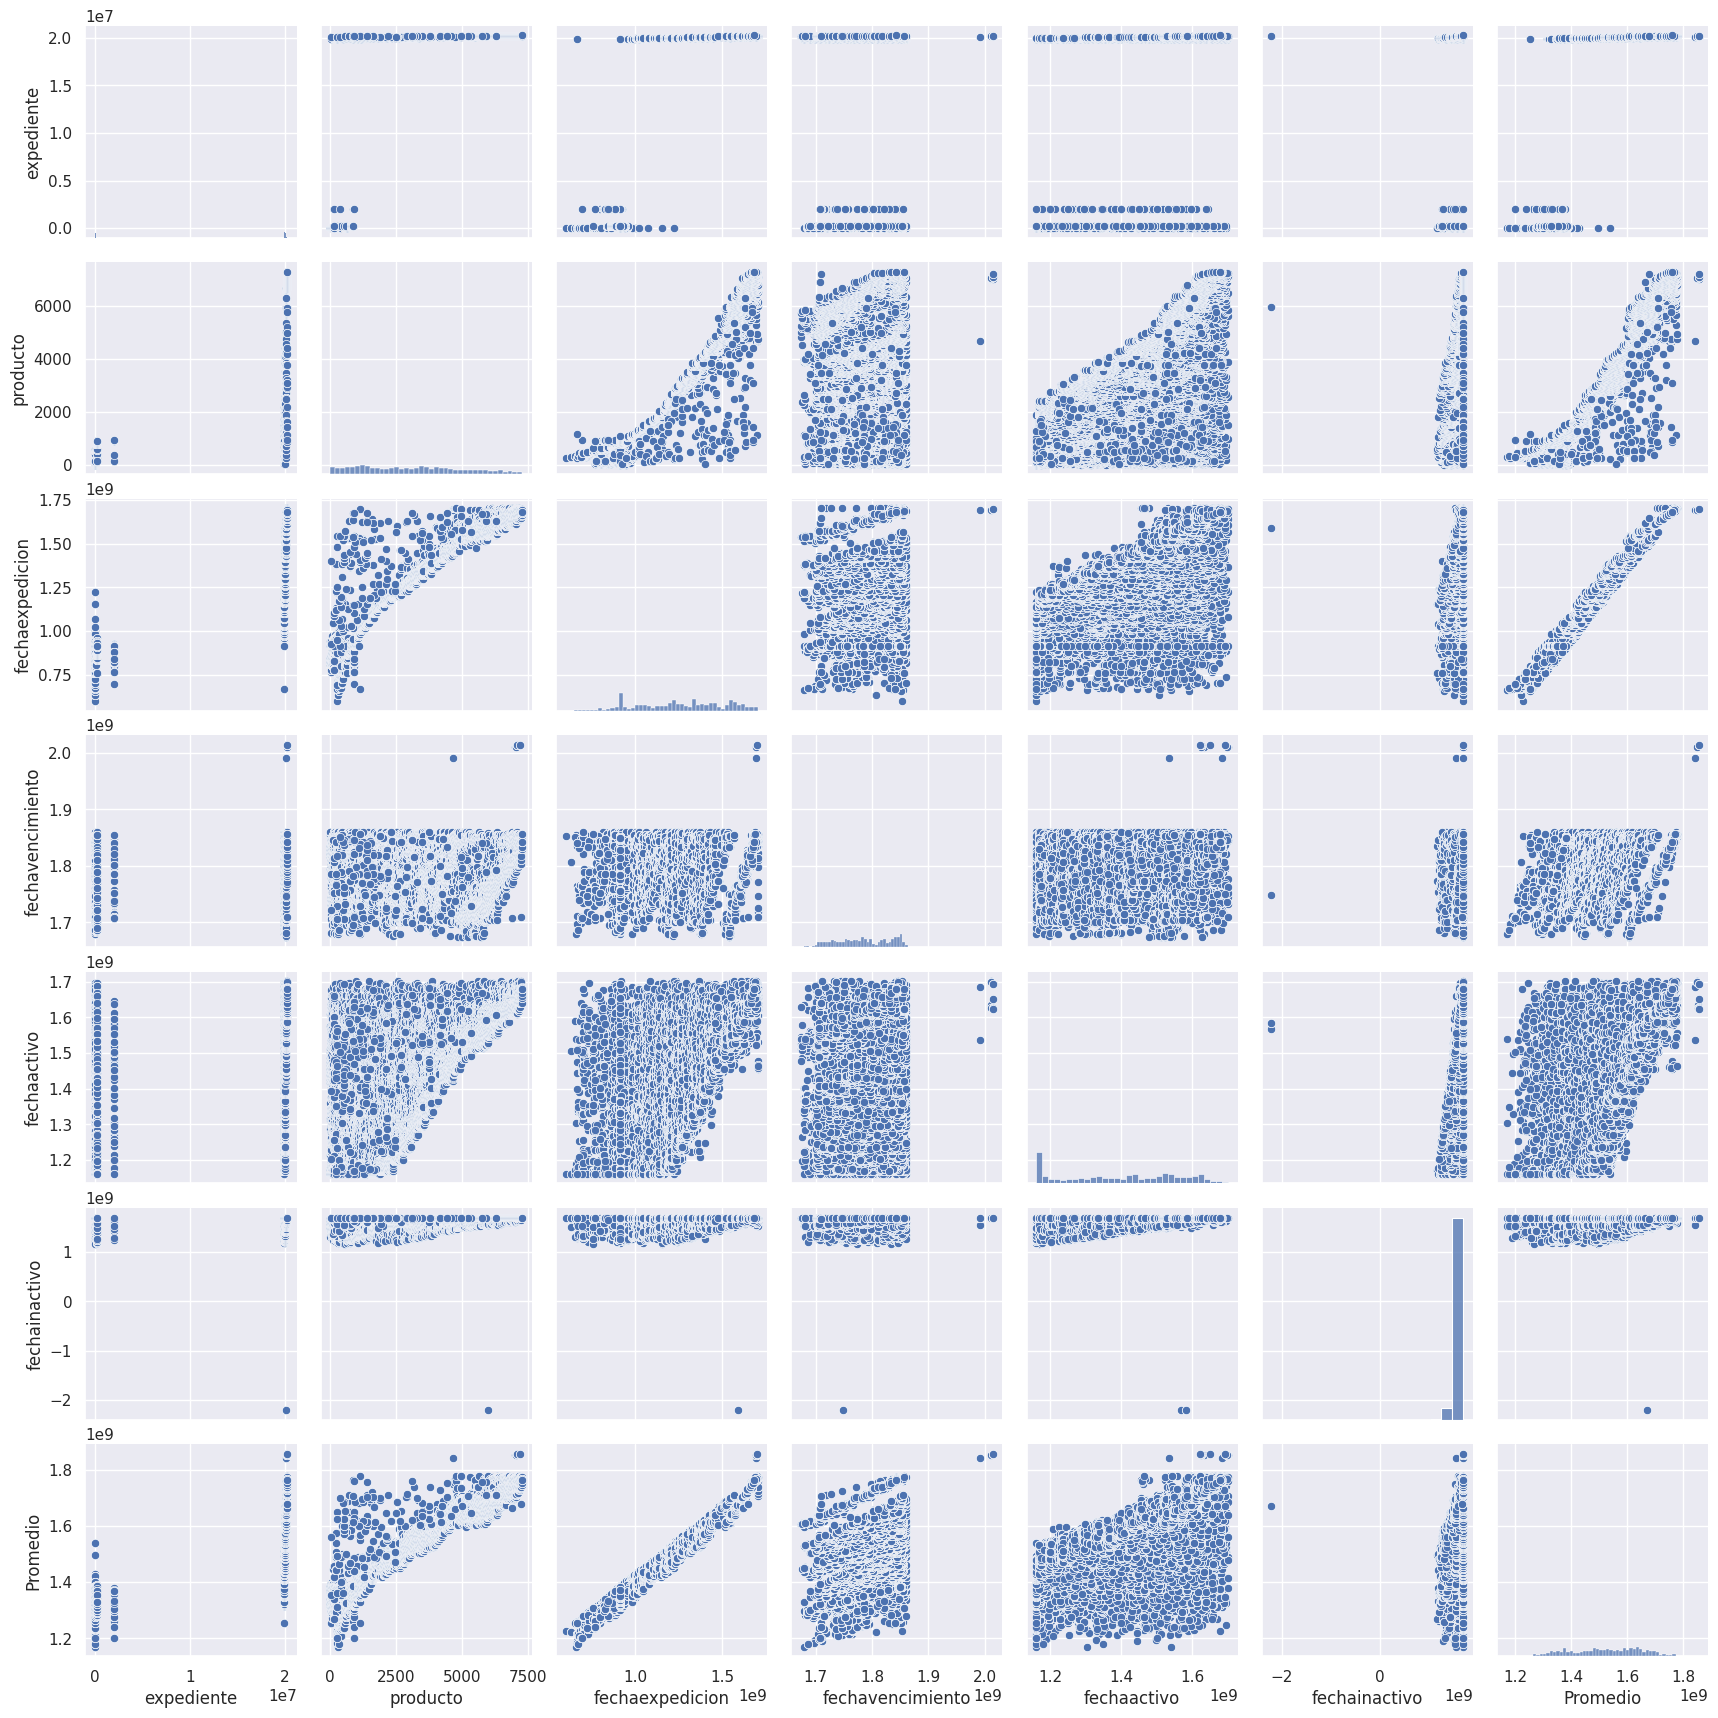

(38698, 14) (38698, 1)


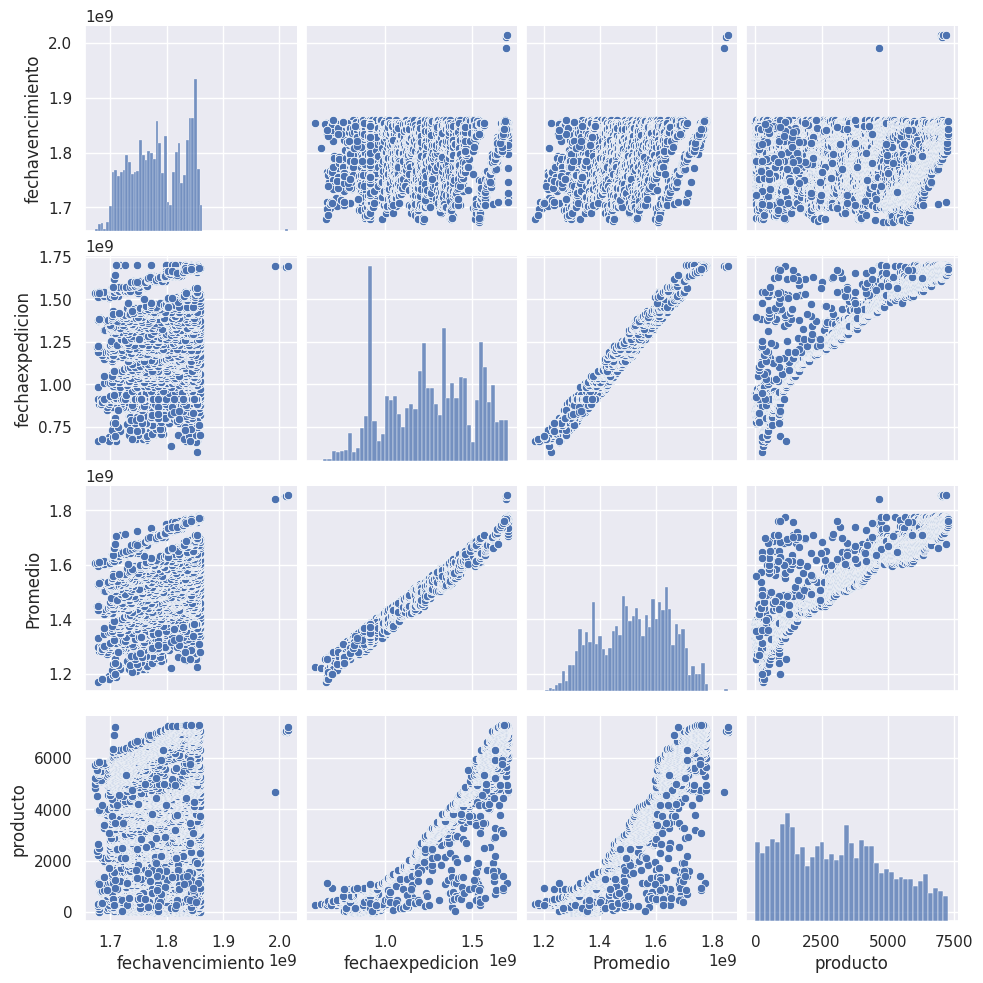

(38698, 4)


,fechavencimiento,fechaexpedicion,Promedio,producto
0,1.794874e+09,945648000.0,1.370261e+09,0
1,1.794874e+09,945648000.0,1.370261e+09,0
2,1.794874e+09,945648000.0,1.370261e+09,0
8,1.794874e+09,945648000.0,1.370261e+09,0
11,1.794874e+09,945648000.0,1.370261e+09,0


In [24]:
X = datos.values[:, 1:]
y = datos.values[:, [1]]

sns.set(rc={'figure.figsize': (15, 15)})

sns.pairplot(datos, diag_kind="hist")

plt.show()

print(X.shape, y.shape)

datos.head(5)

columns = ["fechavencimiento", "fechaexpedicion", "Promedio", 'producto']
X = datos[columns].values

sns.set(rc={'figure.figsize': (15, 15)})

sns.pairplot(datos[columns], diag_kind="hist")  # kind="kde"

plt.show()

print(X.shape)
datos[columns].head(5)

In [25]:
datos.head(10)

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,estadocum,fechaactivo,fechainactivo,principioactivo,nombrerol,tiporol,modalidad,Promedio
0,3521,0,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Inactivo,1.160525e+09,1.449878e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
1,3521,0,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Inactivo,1.160525e+09,1.312243e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
2,3521,0,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Activo,1.312243e+09,1.701907e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
8,3521,0,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Activo,1.315958e+09,1.701907e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
11,3521,0,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Activo,1.358122e+09,1.701907e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
12,3521,0,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Activo,1.449878e+09,1.701907e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
13,3521,0,PROCAPS S.A.,INVIMA 2021M-002103-R3,945648000.0,1.794874e+09,Vigente,Activo,1.504138e+09,1.701907e+09,CETIRIZINA DICLORHIDRATO,PROCAPS S.A.,FABRICANTE,FABRICAR Y VENDER,1.370261e+09
16,5581,1,OM PHARMA SA,INVIMA 2023MB-007838-R4,915148800.0,1.851552e+09,Vigente,Inactivo,1.160525e+09,1.701907e+09,LISADOS BACTERIANOS LIOFILIZADOS DE HAEMOPHILU...,AXON PHARMA S.A.S.,IMPORTADOR,IMPORTAR Y VENDER,1.383350e+09
17,5581,1,OM PHARMA SA,INVIMA 2023MB-007838-R4,915148800.0,1.851552e+09,Vigente,Inactivo,1.160525e+09,1.701907e+09,LISADOS BACTERIANOS LIOFILIZADOS DE HAEMOPHILU...,OM PHARMA SA,FABRICANTE,IMPORTAR Y VENDER,1.383350e+09
20,5581,1,OM PHARMA SA,INVIMA 2023MB-007838-R4,915148800.0,1.851552e+09,Vigente,Inactivo,1.175731e+09,1.454976e+09,LISADOS BACTERIANOS LIOFILIZADOS DE HAEMOPHILU...,AXON PHARMA S.A.S.,IMPORTADOR,IMPORTAR Y VENDER,1.383350e+09


Scatter 4x4

Matriz de correlación

<ipython-input-26-87d6b64f88da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = datos.corr()


<Axes: >

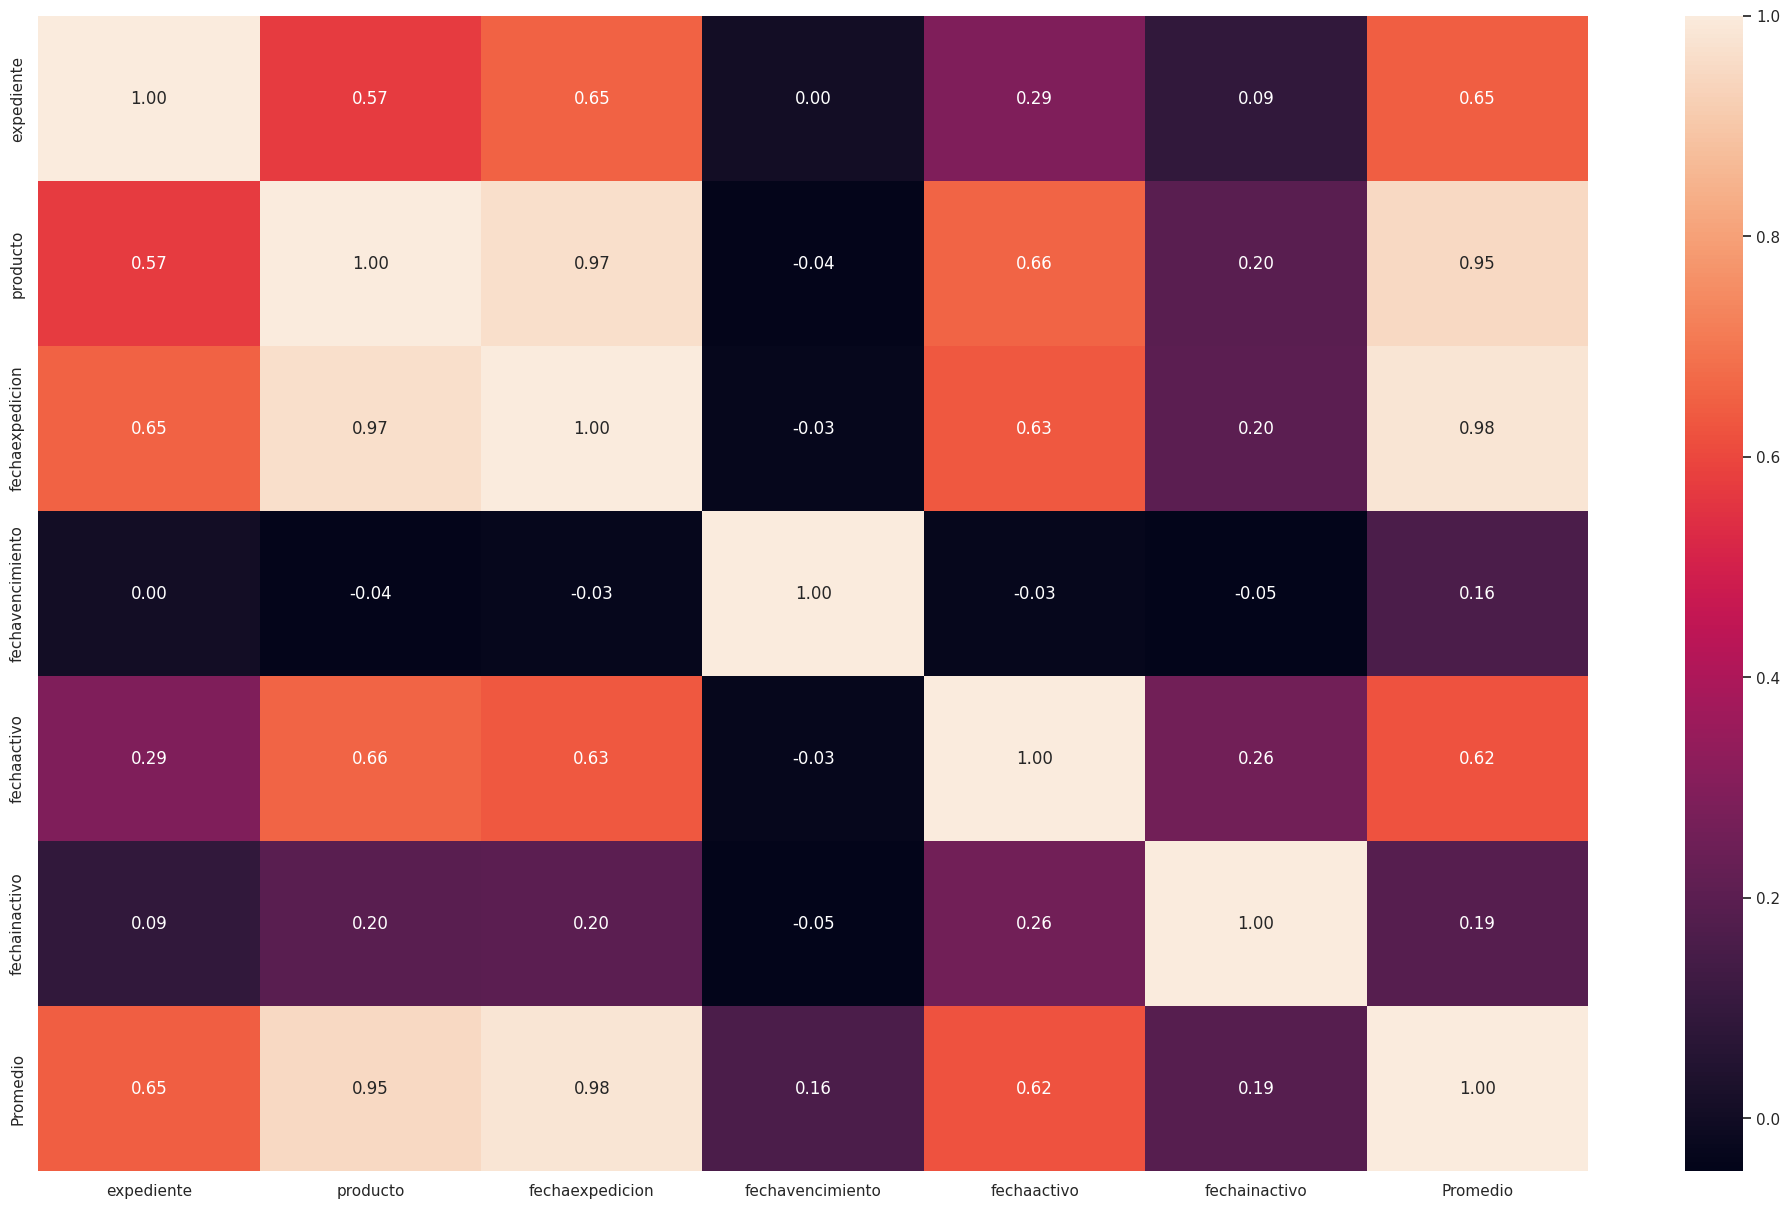

In [26]:
corr = datos.corr()
plt.subplots(figsize = (25,15))
sns.heatmap(corr, annot = True, fmt = '.2f')

# REGRESOR

Gaussian

0.420


<ipython-input-27-88902a5c04bd>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test['fechaexpedicion'], X_test['fechaexpedicion'], c="red" , cmap='coolwarm', marker='x')


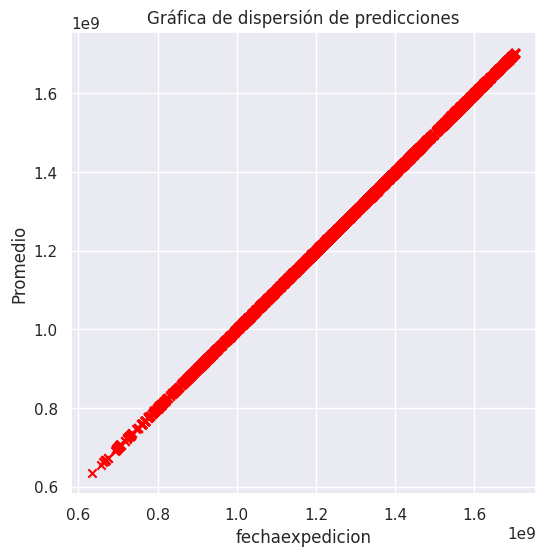

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = datos[['fechaexpedicion']]
y = datos[['Promedio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.array(y_train).ravel()


est = GaussianNB()

est.fit(X_train,y_train)
print("%.3f" % accuracy_score(est.predict(X_test), y_test))

fig = plt.figure(figsize=(6, 6))
plt.scatter(X_test['fechaexpedicion'], X_test['fechaexpedicion'], c="red" , cmap='coolwarm', marker='x')
plt.xlabel('fechaexpedicion')
plt.ylabel('Promedio')
plt.title('Gráfica de dispersión de predicciones')
plt.show()

0.287


<ipython-input-28-38f55509de5c>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test['fechavencimiento'], X_test['fechavencimiento'], c='red', cmap='coolwarm', marker='x')


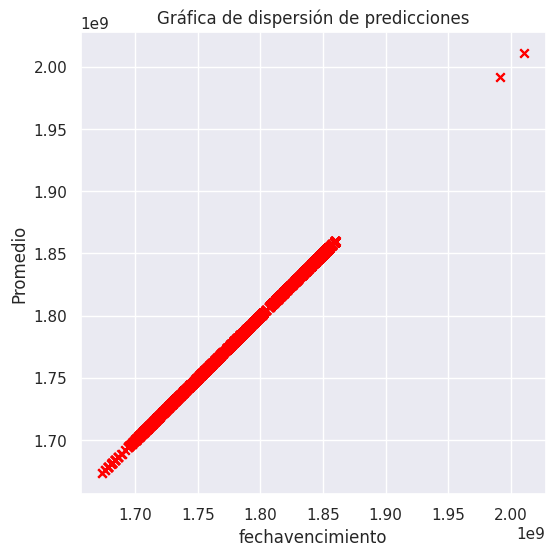

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = datos[['fechavencimiento']]
y = datos[['Promedio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.array(y_train).ravel()


est = GaussianNB()

est.fit(X_train,y_train)
print("%.3f" % accuracy_score(est.predict(X_test), y_test))

fig = plt.figure(figsize=(6, 6))
plt.scatter(X_test['fechavencimiento'], X_test['fechavencimiento'], c='red', cmap='coolwarm', marker='x')
plt.xlabel('fechavencimiento')
plt.ylabel('Promedio')
plt.title('Gráfica de dispersión de predicciones')
plt.show()

0.511


<ipython-input-31-0071577ab84a>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test['producto'], X_test['producto'], c='red', cmap='coolwarm', marker='x')


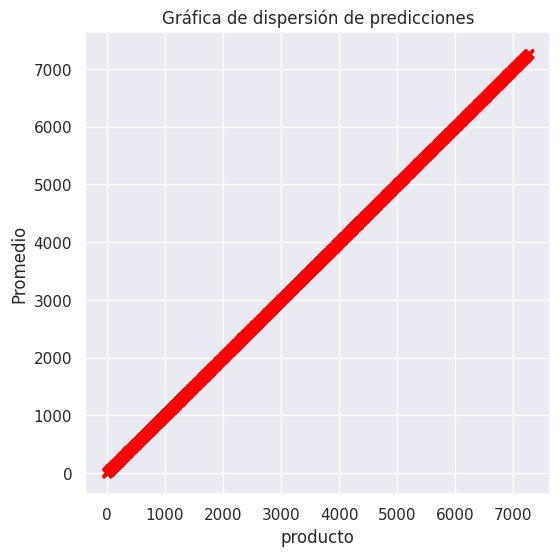

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = datos[['producto']]
y = datos[['Promedio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.array(y_train).ravel()


est = GaussianNB()

est.fit(X_train,y_train)
print("%.3f" % accuracy_score(est.predict(X_test), y_test))

fig = plt.figure(figsize=(6, 6))
plt.scatter(X_test['producto'], X_test['producto'], c='red', cmap='coolwarm', marker='x')
plt.xlabel('producto')
plt.ylabel('Promedio')
plt.title('Gráfica de dispersión de predicciones')
plt.show()

DecisionTreeRegressor

MSE : 1566965076378258.0
RMSE: 39584909.705318995
MAE : 31748130.689751588


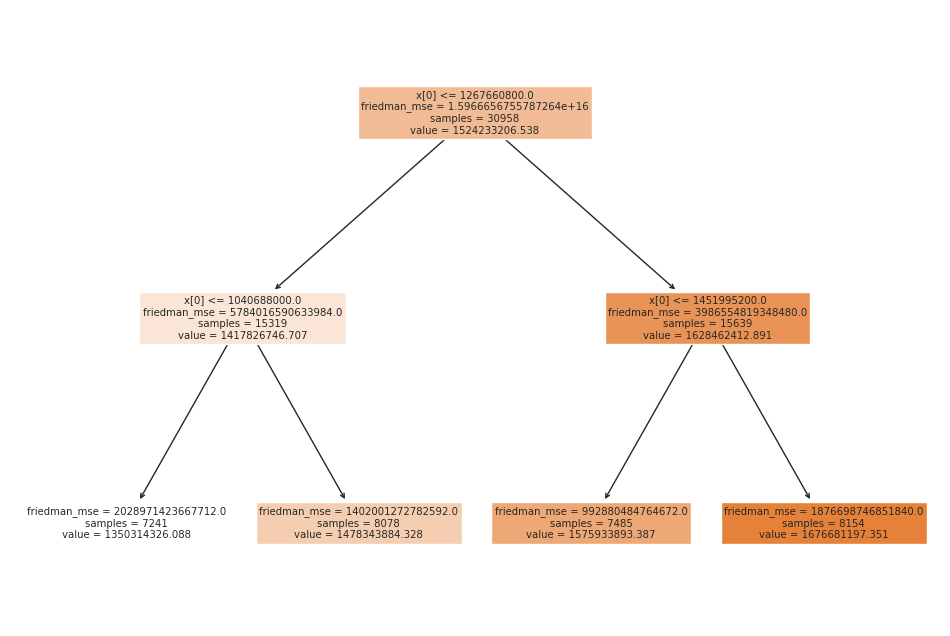

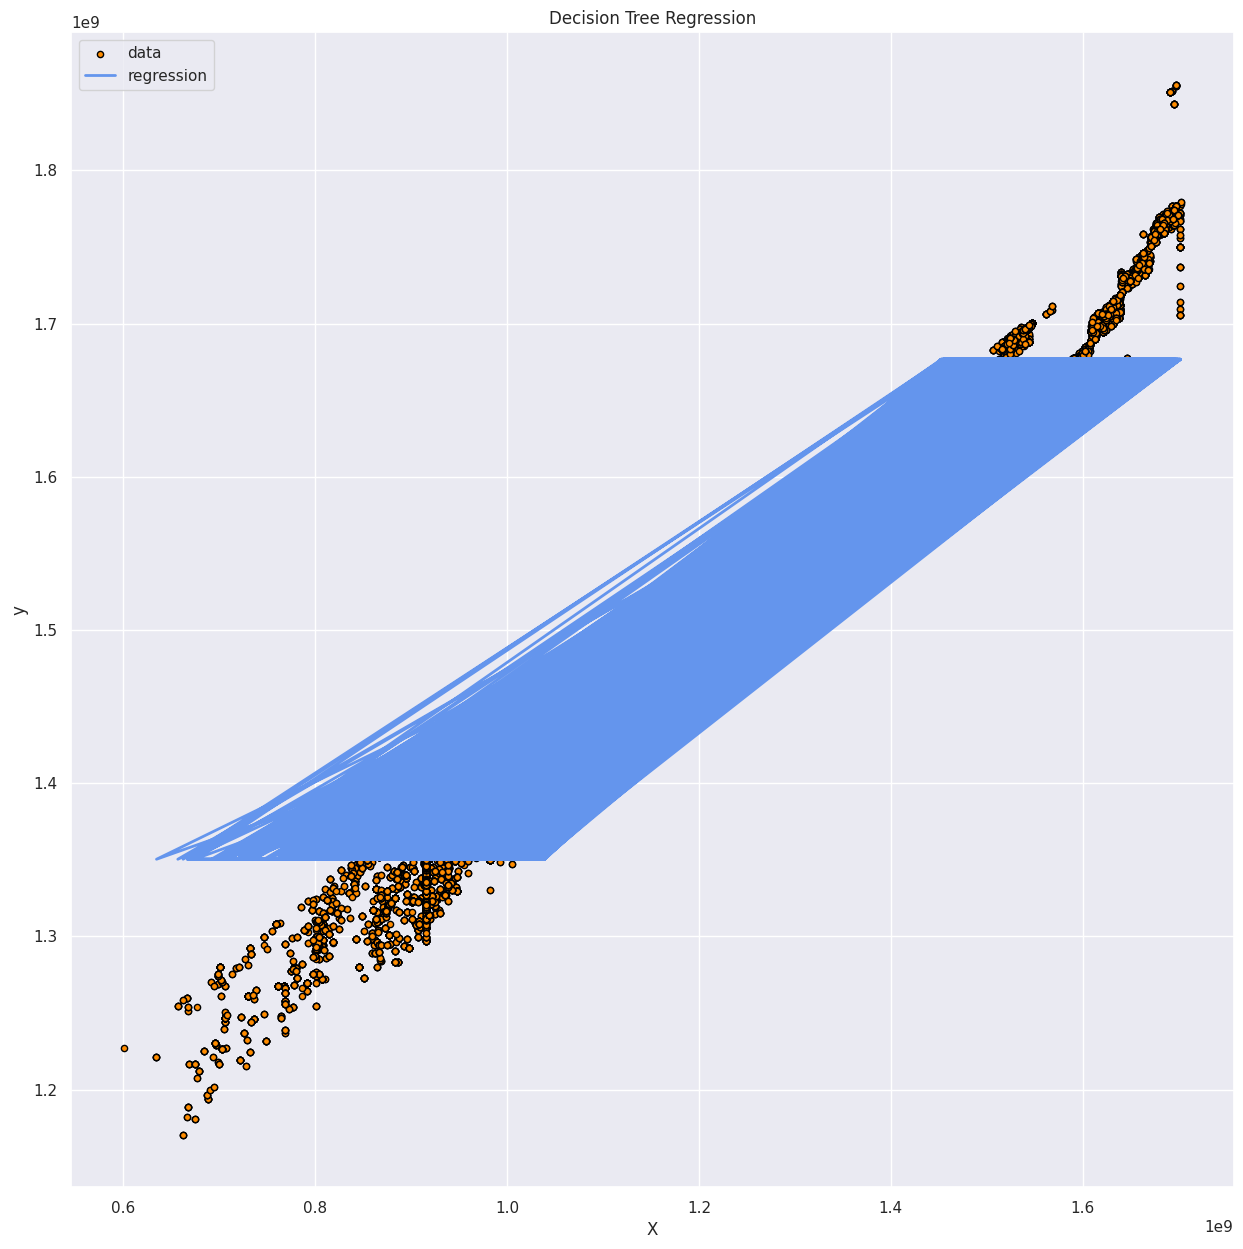

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = datos[['fechaexpedicion']]
y = datos[['Promedio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth = 2
criterion = 'friedman_mse'
clf = DecisionTreeRegressor(max_depth=max_depth, criterion=criterion)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

y_pred = clf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", linewidth=2, label="regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

MSE : 1.5509012343940514e+16
RMSE:  124535185.16443662
MAE : 105395259.32753979


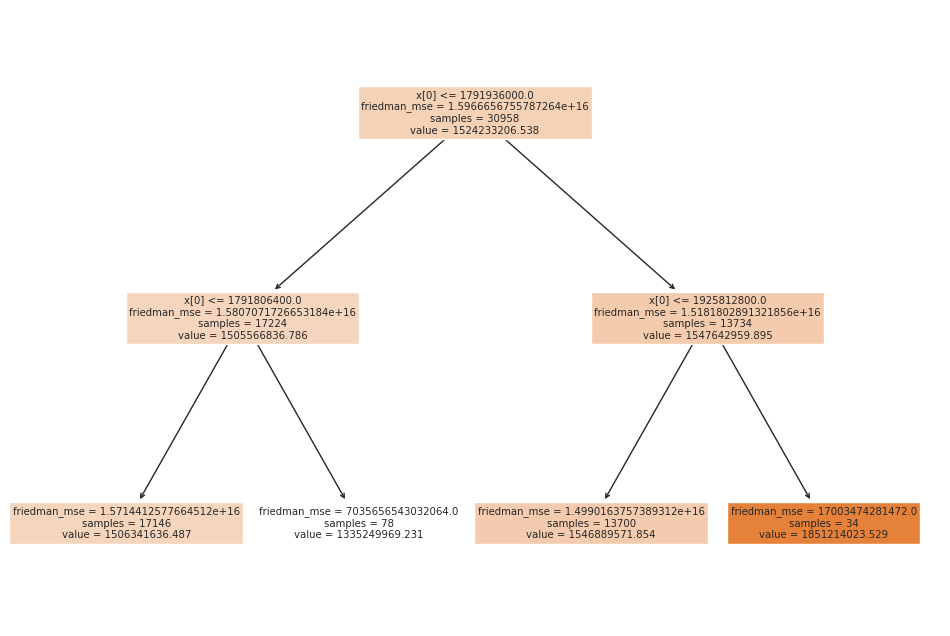

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = datos[['fechavencimiento']]
y = datos[['Promedio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth = 2
criterion = 'friedman_mse'
clf = DecisionTreeRegressor(max_depth=max_depth, criterion=criterion)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

y_pred = clf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()

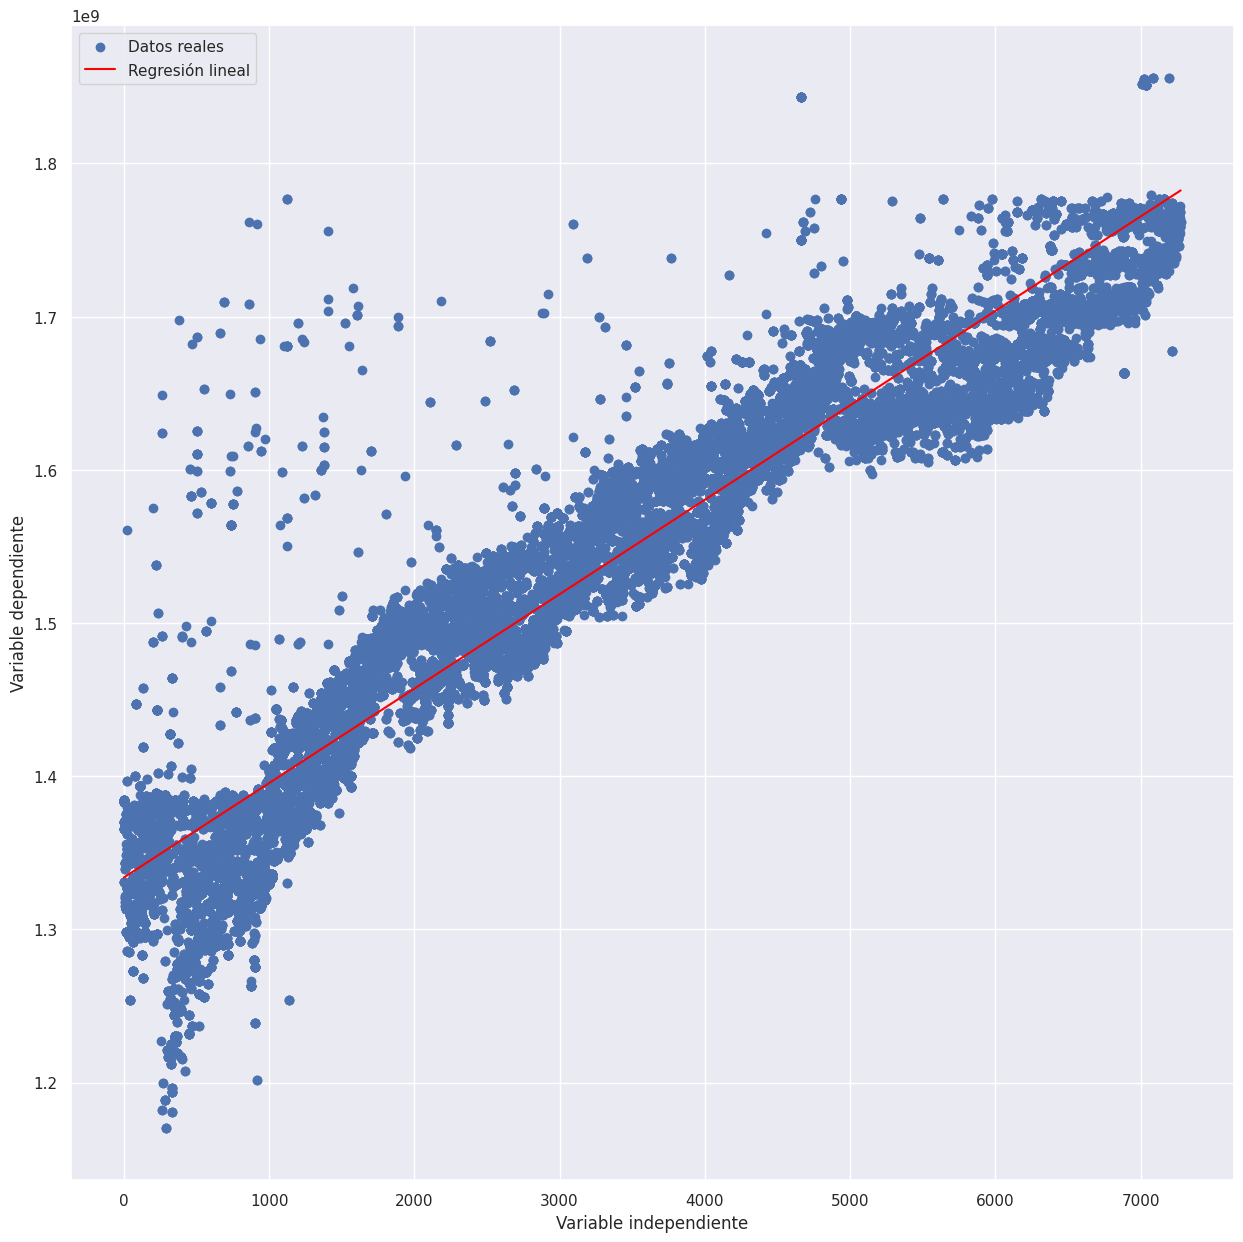

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = datos[['producto']]
y = datos[['Promedio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

plt.scatter(X, y, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.legend()
plt.xlabel('Variable independiente')
plt.ylabel('Variable dependiente')
plt.show()

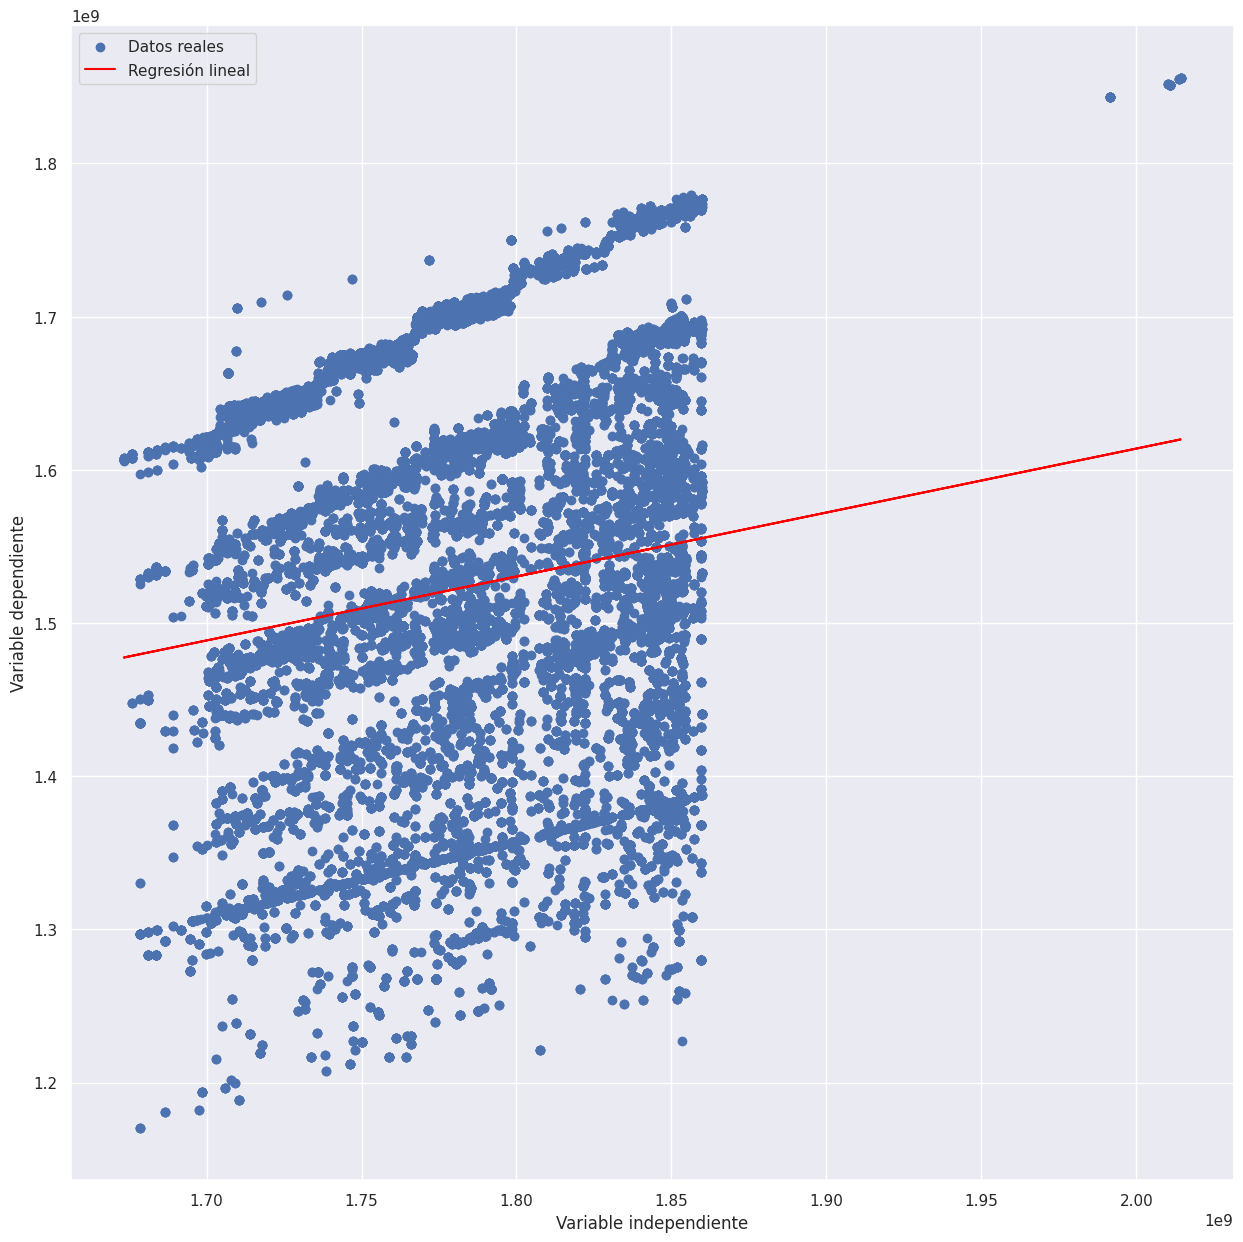

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = datos[['fechavencimiento']]
y = datos[['Promedio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

plt.scatter(X, y, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.legend()
plt.xlabel('Variable independiente')
plt.ylabel('Variable dependiente')
plt.show()

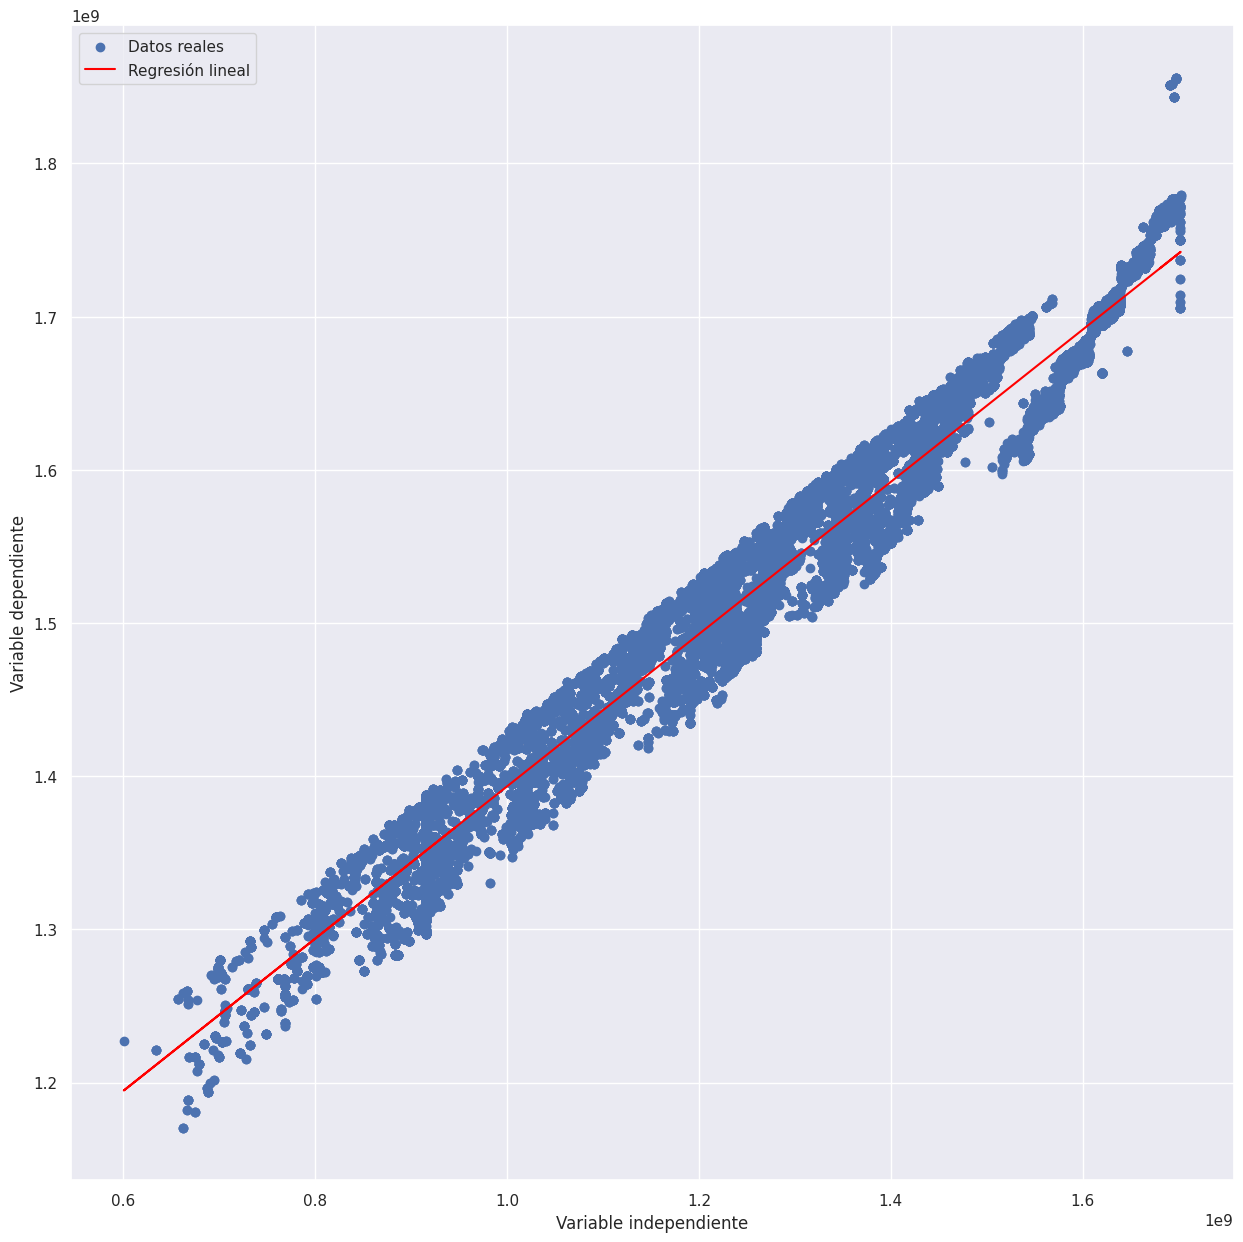

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = datos[['fechaexpedicion']]
y = datos[['Promedio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

plt.scatter(X, y, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.legend()
plt.xlabel('Variable independiente')
plt.ylabel('Variable dependiente')
plt.show()

# CLASIFICADOR

DecisionTreeClassifier

Precisión del modelo: 0.017054263565891473


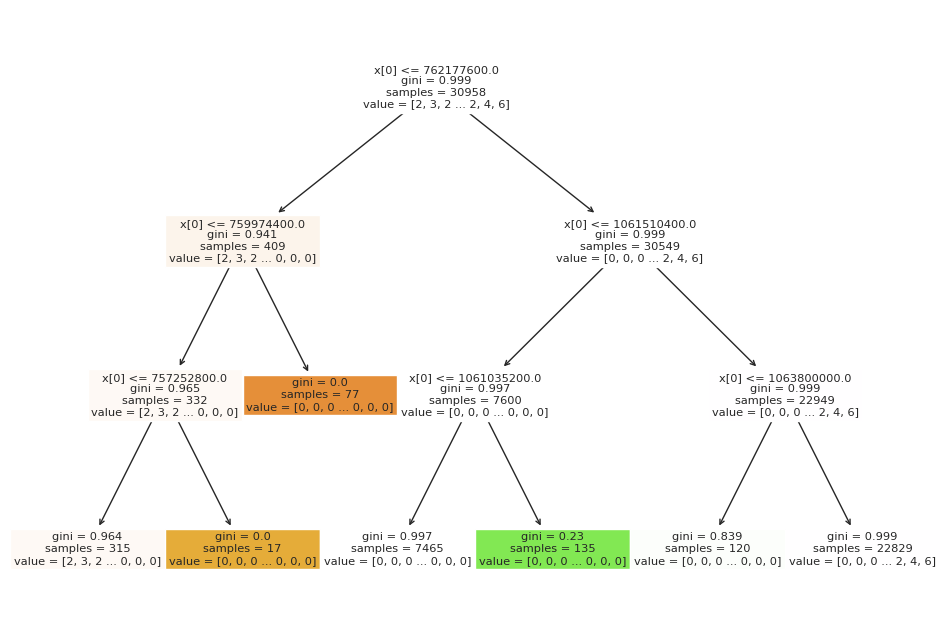

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X = datos[['fechaexpedicion']]
y = datos[['Promedio']]
np.random.seed(20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth = 3
criterion = 'gini'
clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()

Precisión del modelo: 0.024160206718346254


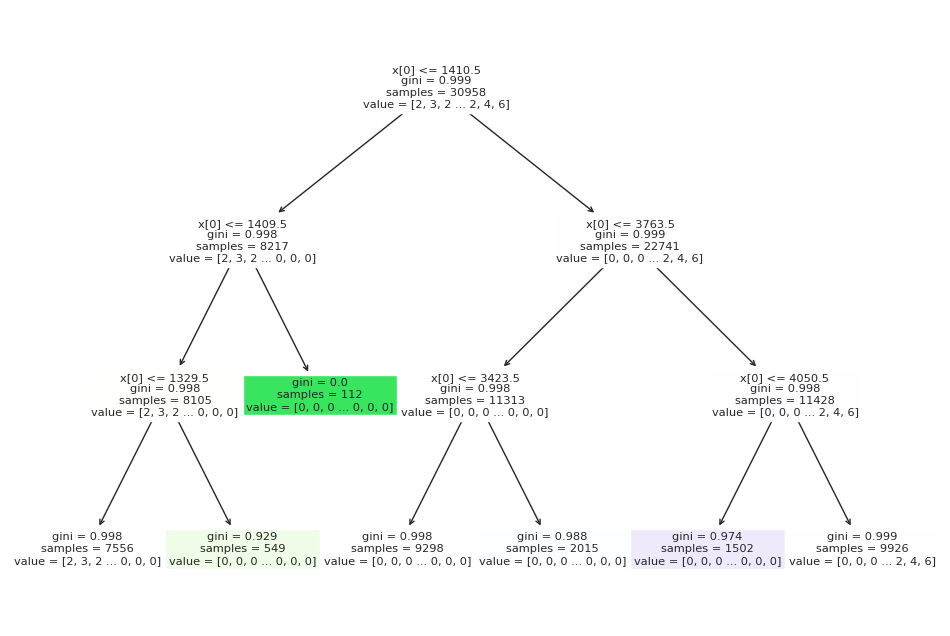

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X = datos[['producto']]
y = datos[['Promedio']]
np.random.seed(20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth = 3
criterion = 'gini'
clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()

Precisión del modelo: 0.021576227390180877


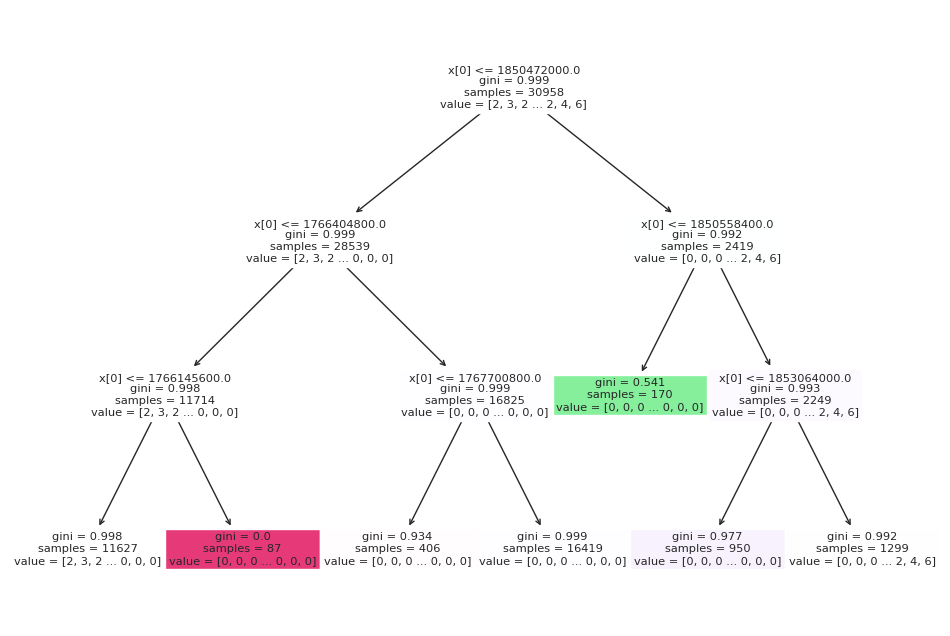

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = datos[['fechavencimiento']]
y = datos[['Promedio']]
np.random.seed(20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth = 3
criterion = 'gini'
clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()



RandomForestClassifier



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = datos[['fechaexpedicion']]
y = datos[['Promedio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.array(y_train).ravel()
n_estimators = 100
max_depth = 400
criterion = 'gini'
clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted Values')
plt.xlabel('Fecha de Vencimiento')
plt.ylabel('Promedio')
plt.legend()
plt.title('Random Forest Classifier Predictions vs. Actual Values')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = datos[['fechavencimiento']]
y = datos[['Promedio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.array(y_train).ravel()
n_estimators = 100
max_depth = 400
criterion = 'gini'
clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted Values')
plt.xlabel('Fecha de Expedicion')
plt.ylabel('Promedio')
plt.legend()
plt.title('Random Forest Classifier Predictions vs. Actual Values')
plt.show()

PCA

In [43]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

columna_pca = ['producto', 'Promedio']

data_for_pca = datos[columna_pca]

mean = np.mean(data_for_pca)
std = np.std(data_for_pca)
print("mean:", mean)
print("std:", std)

standardized_data = (data_for_pca - mean) / std

mean: producto    3.086220e+03
Promedio    1.524067e+09
dtype: float64
std: producto    1.944146e+03
Promedio    1.264999e+08
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [42]:
standardized_data

,producto,Promedio
0,-1.587443,-1.215856
1,-1.587443,-1.215856
2,-1.587443,-1.215856
8,-1.587443,-1.215856
11,-1.587443,-1.215856
...,...,...
114701,2.154046,1.931087
114702,2.154046,1.931087
114703,2.154046,1.931087
114704,2.154561,1.878496


In [44]:
covariance_matrix = np.cov(standardized_data, ddof = 1, rowvar = False)
covariance_matrix

array([[1.00002584, 0.94747949],
       [0.94747949, 1.00002584]])

In [45]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("eigenvalues", eigenvalues)

print("eigenvectors", eigenvectors)

eigenvalues [1.94750533 0.05254635]
eigenvectors [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [46]:
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list
order_of_importance = np.argsort(eigenvalues)[::-1]

# utilize the sort order to sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance] # sort the columns

In [47]:
# use sorted_eigenvalues to ensure the explained variances correspond to the eigenvectors
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

In [48]:
k = 2 # select the number of principal components
reduced_data = np.matmul(standardized_data, sorted_eigenvectors[:,:k]) # transform the original data

print(reduced_data)

               0         1
0      -1.982232  0.262751
1      -1.982232  0.262751
2      -1.982232  0.262751
8      -1.982232  0.262751
11     -1.982232  0.262751
...          ...       ...
114701  2.888625 -0.157656
114702  2.888625 -0.157656
114703  2.888625 -0.157656
114704  2.851801 -0.195208
114705  2.852165 -0.195571

[38698 rows x 2 columns]


In [49]:
total_explained_variance = sum(explained_variance[:k])

print(explained_variance)

print("total_explained_variance (k=2):", total_explained_variance)

[0.9737275 0.0262725]
total_explained_variance (k=2): 1.0


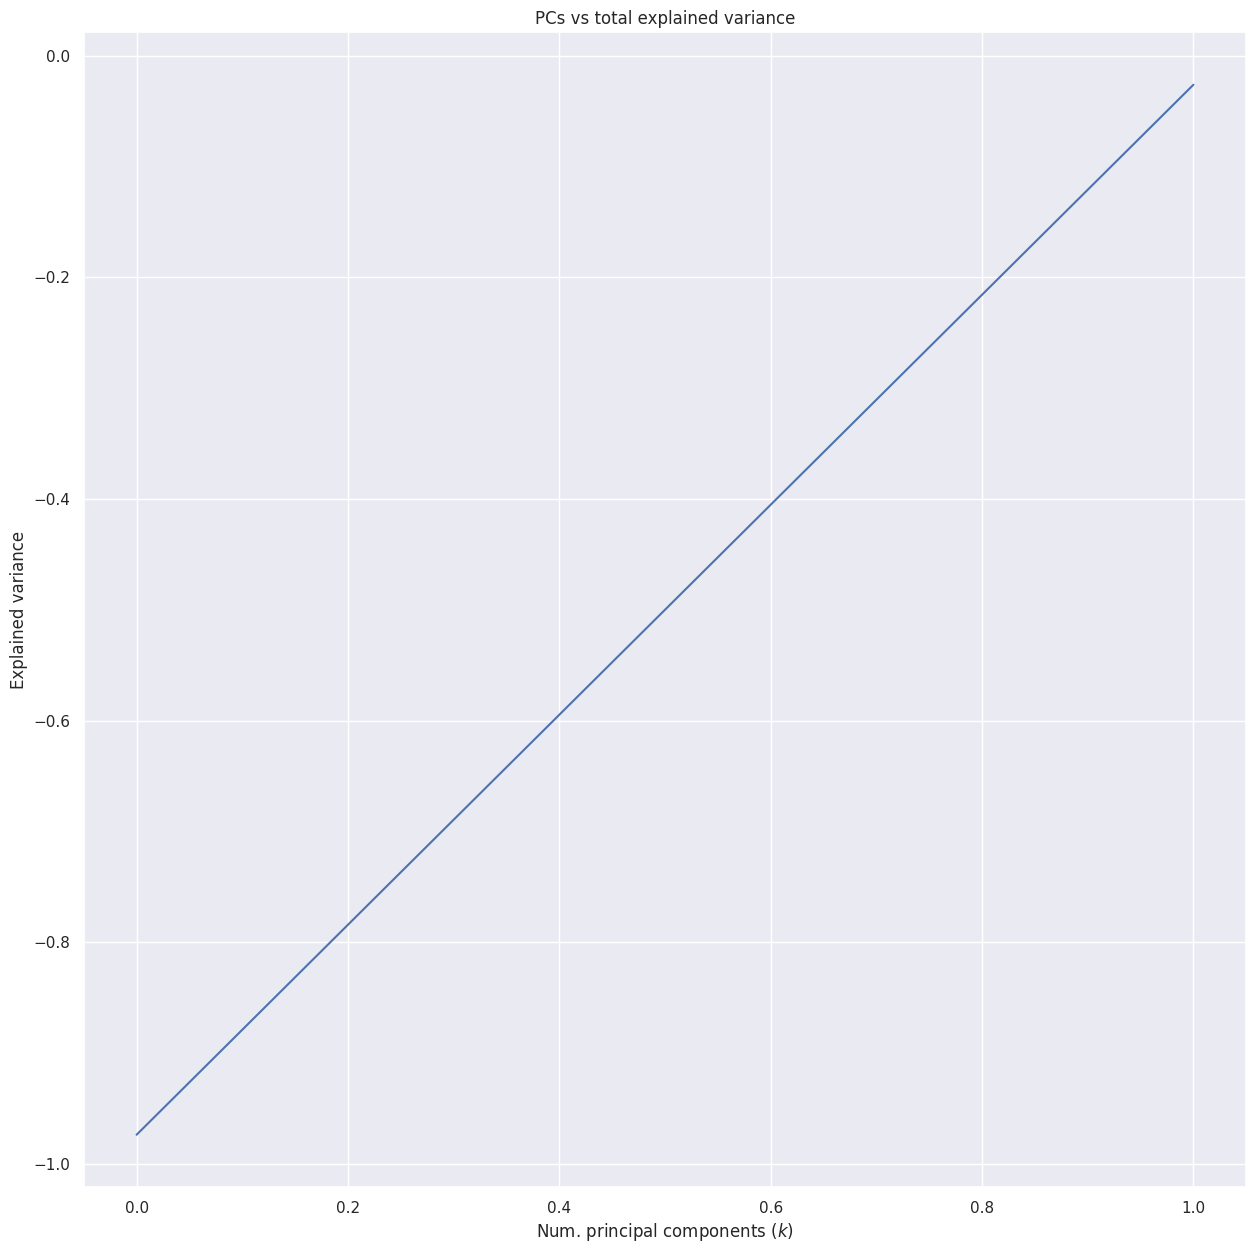

In [50]:
plt.plot(-1*explained_variance)
plt.title("PCs vs total explained variance")
plt.xlabel("Num. principal components ($k$)")
plt.ylabel("Explained variance")
plt.show()

In [53]:
from sklearn.decomposition import PCA

mypca = PCA(n_components=2)
X_pca = mypca.fit_transform(standardized_data)

<ipython-input-54-9d802de55cd3>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0], X_pca[:,1], cmap="rainbow")


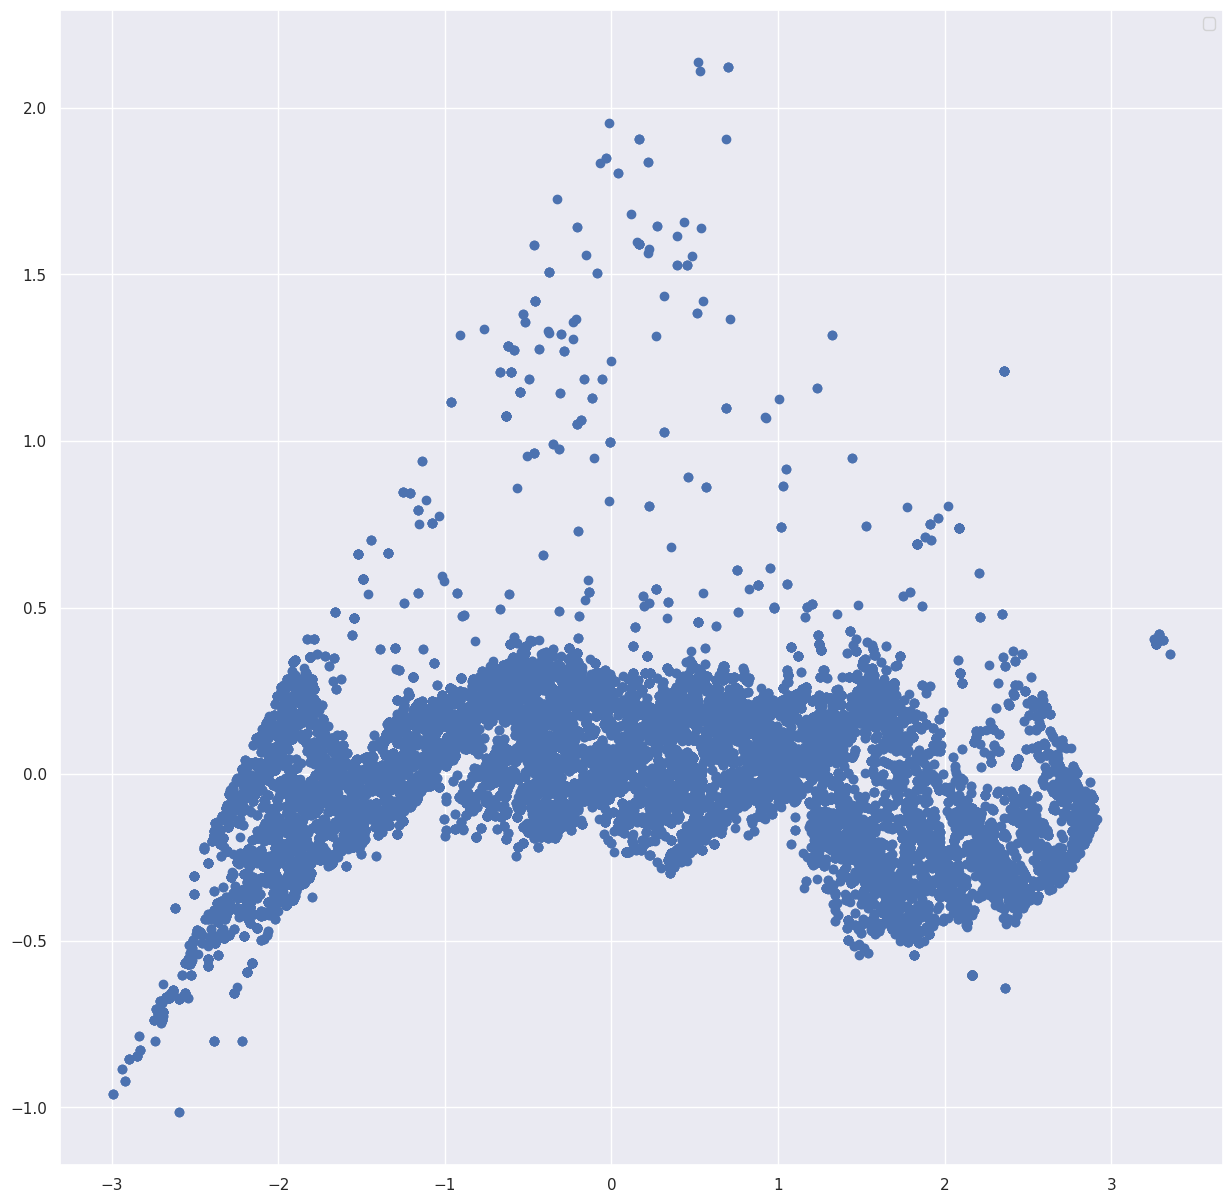

In [54]:
plt.scatter(X_pca[:,0], X_pca[:,1], cmap="rainbow")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error: 4.093354151531826e+17
Valor real: 1705838400.0, Predicción: 896349918.5652286
Valor real: 1571097600.0, Predicción: 896349917.8152499
Valor real: 1651708800.0, Predicción: 896349918.1605878
Valor real: 1682078400.0, Predicción: 896349918.5227963
Valor real: 1358726400.0, Predicción: 896349917.1342877
Valor real: 1557921600.0, Predicción: 896349917.8211291
Valor real: 1700956800.0, Predicción: 896349918.6600623
Valor real: 1299672000.0, Predicción: 896349917.0892992
Valor real: 1776470400.0, Predicción: 896349918.800907
Valor real: 1632528000.0, Predicción: 896349918.0473497


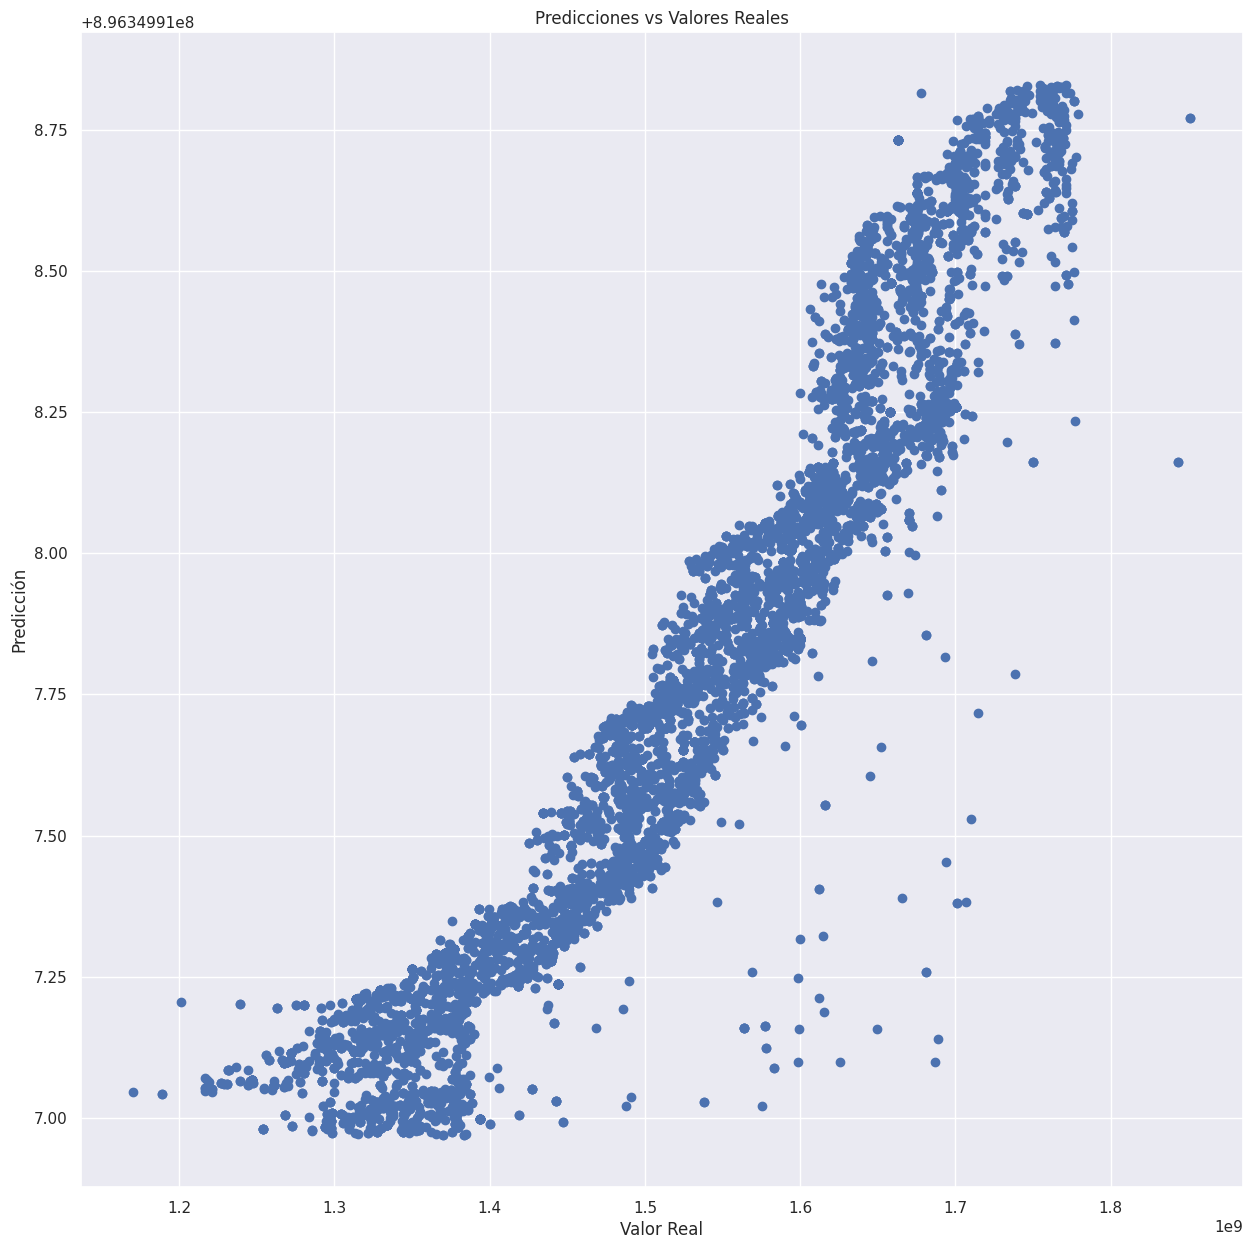

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

X = datos[['producto']].values
y = datos['Promedio'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

predicciones = model.predict(X_test)

mse = mean_squared_error(y_test, predicciones)
print(f'Mean Squared Error: {mse}')

for i in range(10):
    print(f'Valor real: {y_test[i]}, Predicción: {predicciones[i][0]}')

plt.scatter(y_test, predicciones)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')
plt.show()